<a href="https://colab.research.google.com/github/b-jahnavi21/Myntra_CodeTriad/blob/main/Myntra_CodeTriad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filepath='/content/fashion_data_2018_2022.xls'
data=pd.read_excel(filepath)
data.head()
data.tail()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
655,1656,Wool Jacket,Female,Jacket,Geometric,Green,25-35,Summer,48.45,Wool,328,76,5.0,2,ZARA,0.20,2022-12-10,127,12,2022
656,1657,Summer Dress,Female,Dress,Plain,White,18-24,Winter,61.52,Cotton,200,42,4.7,3,ZARA,0.10,2022-12-26,86,12,2022
657,1658,Blouse,Female,Shoes,Geometric,White,35-45,Autumn,31.07,Synthetic,478,42,4.0,3,ZARA,0.10,2022-12-01,111,12,2022
658,1659,Biker Jacket,Male,Shirt,Polka Dots,Red,18-24,Winter,139.69,Cotton Blend,125,50,4.8,3,ZARA,0.05,2022-12-12,127,12,2022
659,1660,Casual Jeans,Female,Shirt,Geometric,White,25-35,Spring,119.86,Synthetic,215,66,3.6,4,ZARA,0.00,2022-12-15,205,12,2022


In [ ]:
data.columns

Index(['product_id', 'product_name', 'gender', 'category', 'pattern', 'color',
       'age_group', 'season', 'price', 'material', 'sales_count',
       'reviews_count', 'average_rating', 'out_of_stock_times', 'brand',
       'discount', 'last_stock_date', 'wish_list_count', 'month_of_sale',
       'year_of_sale'],
      dtype='object')

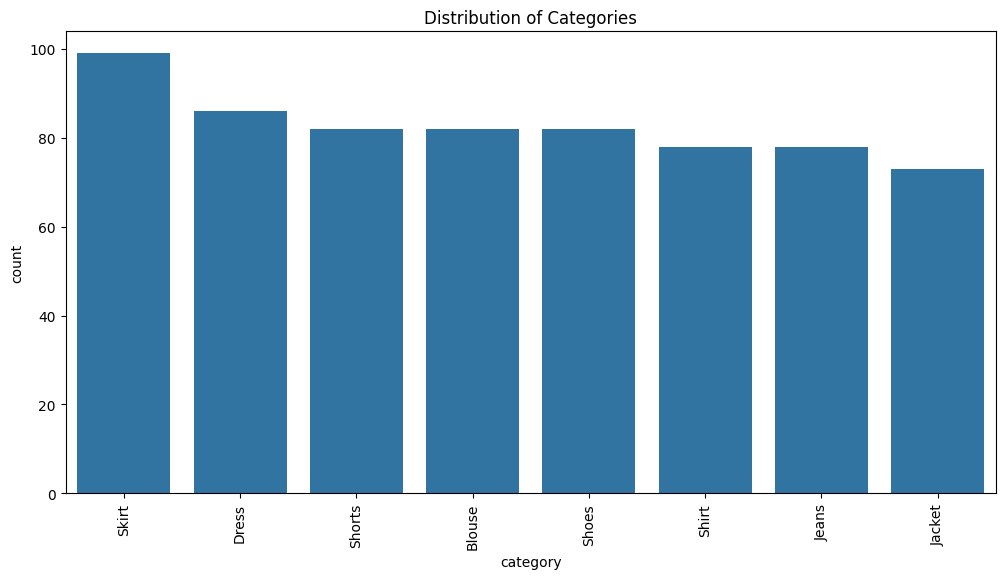

In [ ]:
# Plot the distribution of categories
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='category', order=data['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()


**Graph: Distribution of Categories**

The y-axis shows the count, and the x-axis shows the categories.  Here’s a breakdown of the information in the graph, starting from the highest count and going down:

Shirts: 78


Jeans: 78


Shoes: 82


Jackets: 73


Blouses: 82


Shorts: 82


Dresses: 86


Skirts: 99

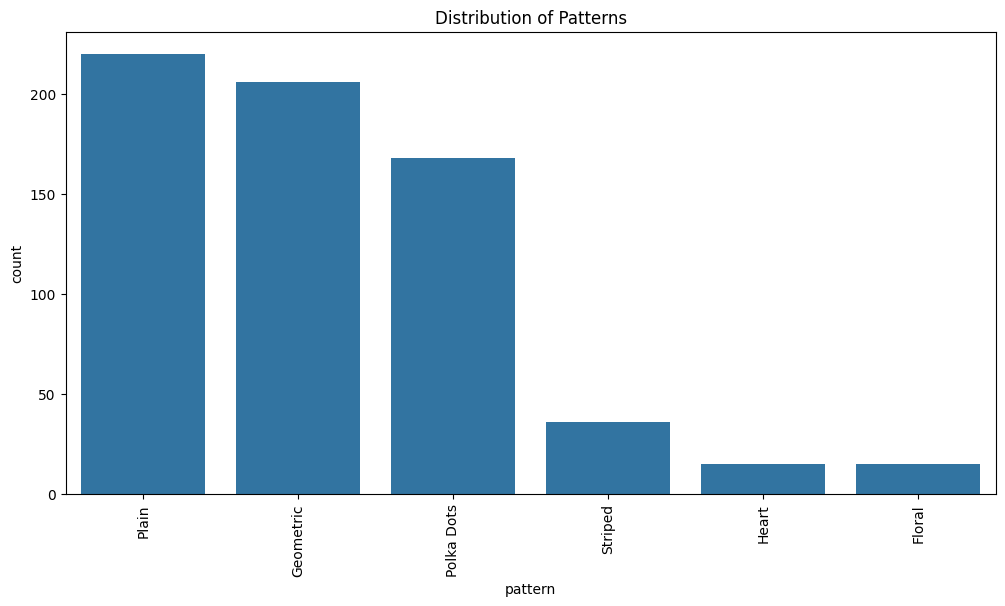

In [ ]:
# Plot the distribution of patterns
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='pattern', order=data['pattern'].value_counts().index)
plt.title('Distribution of Patterns')
plt.xticks(rotation=90)
plt.show()

**Graph: Distribution of Patterns**


The y-axis shows the count, while the x-axis lists the different pattern types. Here’s a breakdown of the information in the graph:


Plain: 200


Geometric: 150


Polka Dots: 100


Striped: 50


Heart: 50


Floral: Less than 50


Plain patterns are the most common, with 200, followed by geometric patterns at 150. Polka dot patterns come in at 100, with striped and heart patterns tied at 50. Floral patterns are the least common, with a count of less than 50.

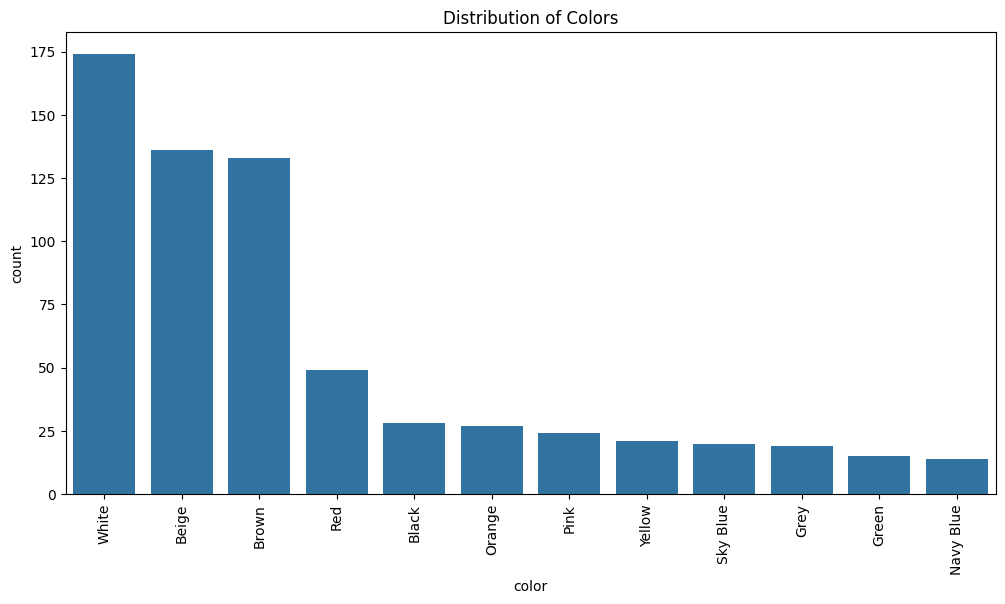

In [ ]:
# Plot the distribution of colors
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='color', order=data['color'].value_counts().index)
plt.title('Distribution of Colors')
plt.xticks(rotation=90)
plt.show()

**Graph: Distribution of Colors**

The y-axis shows the count, while the x-axis lists the different colors. Here's a breakdown of the information in the graph:

White: 174


Beige: 136


Brown: 133


Red: 49


Black: 28


Orange: 27


Pink: 24


Yellow: 21


Sky Blue: 20


Grey: 19


Green: 15


Navy Blue: 14


White is the most common color, with a count of 174. It is followed by beige at 136, followed by Brown of 133. Black, orange, pink, sky blue, green, red and navy blue all have counts less than 50.

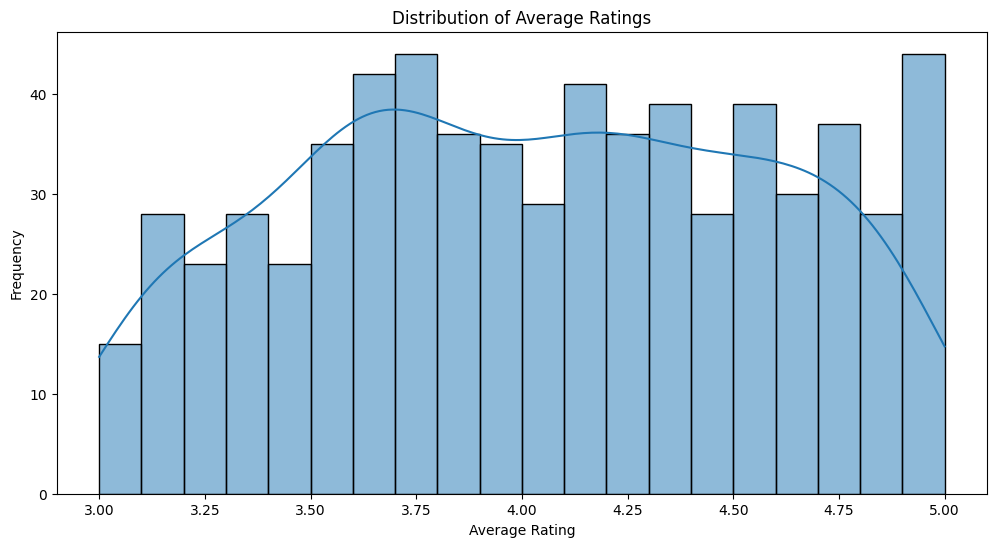

In [ ]:
# Plot the distribution of average ratings
plt.figure(figsize=(12, 6))
sns.histplot(data['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

**Here are some observations from the graph "Distribution of Average Ratings": **



*   The most frequent average rating falls between 4.00 and 4.25.
*   Ratings are fairly evenly distributed between 3.00 and 5.00, although there are fewer movies with very high or very low ratings.
*  
It is difficult to say definitively how many movies received a particular average rating because the tick marks on the y-axis are not labeled.

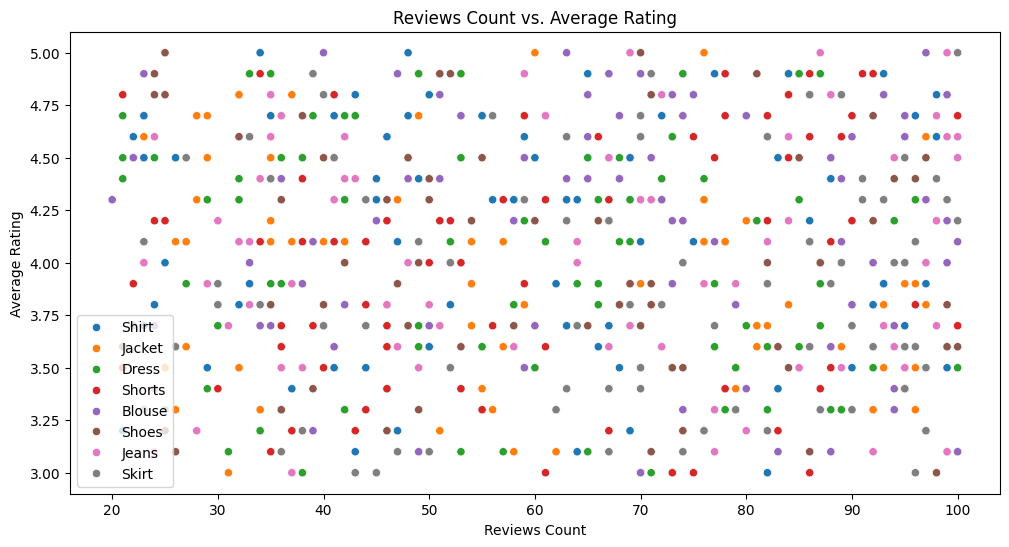

In [ ]:
# Plot the relationship between review count and average rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='reviews_count', y='average_rating', hue='category')
plt.title('Reviews Count vs. Average Rating')
plt.xlabel('Reviews Count')
plt.ylabel('Average Rating')
plt.legend(loc='best')
plt.show()

**Here are some observations from the graph "Review count and Average rating":**



*   The average rating appears to generally increase as the number of reviews increases. This could indicate that products with more reviews are generally viewed more favorably by consumers.
*   There is a lot of variation in the data however, especially for products with fewer reviews. Some products with fewer reviews have a high average rating, while others have a low average rating.
*   It is difficult to say for certain how many reviews a particular product has or what its average rating is because the data points are not labeled.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# One-hot encoding for categorical variables
categorical_columns = ['category', 'pattern', 'color', 'gender', 'age_group', 'season', 'material', 'brand']
data_encoded = pd.get_dummies(data[categorical_columns])

# Apply the Apriori algorithm
frequent_itemsets = apriori(data_encoded, min_support=0.1, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets.head())

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the top rules
print(rules.head())


    support           itemsets
0  0.124242  (category_Blouse)
1  0.130303   (category_Dress)
2  0.110606  (category_Jacket)
3  0.118182   (category_Jeans)
4  0.118182   (category_Shirt)
         antecedents        consequents  antecedent support  \
0       (brand_ZARA)  (category_Blouse)            1.000000   
1  (category_Blouse)       (brand_ZARA)            0.124242   
2       (brand_ZARA)   (category_Dress)            1.000000   
3   (category_Dress)       (brand_ZARA)            0.130303   
4       (brand_ZARA)  (category_Jacket)            1.000000   

   consequent support   support  confidence  lift  leverage  conviction  \
0            0.124242  0.124242    0.124242   1.0       0.0         1.0   
1            1.000000  0.124242    1.000000   1.0       0.0         inf   
2            0.130303  0.130303    0.130303   1.0       0.0         1.0   
3            1.000000  0.130303    1.000000   1.0       0.0         inf   
4            0.110606  0.110606    0.110606   1.0       0.0 

The objective of the code is to use association rule mining to identify relationships between different categorical features in the fashion dataset. Specifically, it uses the Apriori algorithm to find frequent itemsets and then generates association rules based on these itemsets.

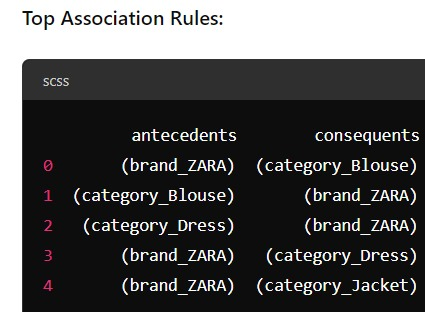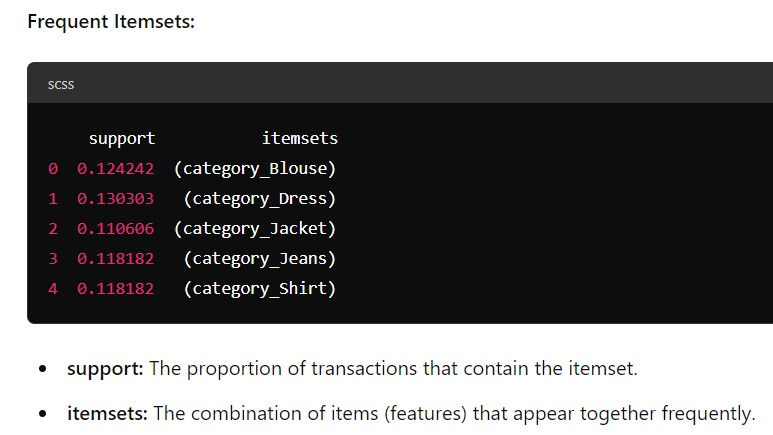

CLUSTERING ALGORITHMS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['price', 'sales_count', 'average_rating', 'discount', 'wish_list_count']

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display cluster centroids
print(kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[-0.17685901  1.10408077  0.56313836  0.37146407 -0.54549004]
 [ 0.65470391  0.45676477 -0.86739252 -0.53607178  0.45526926]
 [-0.71961344 -0.48393269  0.6043426   0.29658685  0.95127406]
 [ 1.13938185 -0.82774495  0.52386381 -0.01486821 -0.28751903]
 [-0.73153648 -0.53796277 -0.75327698 -0.12526114 -0.64057833]]


The above code implements KMeans clustering on a dataset, focusing on five key features: price, sales count, average rating, discount, and wish list count. Here's a breakdown of the steps and an interpretation of the results:

### Steps:

1. **Feature Selection**:
   - The features chosen for clustering are `price`, `sales_count`, `average_rating`, `discount`, and `wish_list_count`. These metrics are important for understanding customer preferences and product performance in the fashion domain.

2. **Standardization**:
   - The `StandardScaler` is used to standardize the selected features, ensuring that they have a mean of 0 and a standard deviation of 1. This step is crucial because KMeans is sensitive to the scale of the data. Standardization allows for better clustering results.

3. **KMeans Clustering**:
   - The KMeans algorithm is applied with `n_clusters=5`, meaning the dataset is divided into five clusters based on the standardized feature values. A `random_state` of 42 ensures reproducibility of results.

4. **Cluster Assignment**:
   - Each data point in the dataset is assigned to one of the five clusters, which are stored in a new column called `cluster`.

5. **Cluster Centroids**:
   - The centroids of the clusters are printed. These centroids represent the average position of all data points in each cluster in the standardized feature space.

### Interpretation of Cluster Centroids:

The output of the cluster centroids provides insights into the characteristics of each cluster:

1. **Cluster 0**:
   - Higher sales count and average rating, moderate price, moderate discount, and lower wish list count.
  
2. **Cluster 1**:
   - Higher price and lower average rating, moderate sales count, significant discount, and moderate wish list count.

3. **Cluster 2**:
   - Lower price and sales count, high average rating, moderate discount, and very high wish list count, indicating potentially high interest from customers.

4. **Cluster 3**:
   - Very high price and negative average rating, lower sales count, near-zero discount, and lower wish list count, suggesting less favorable products.

5. **Cluster 4**:
   - Low price, moderate sales count and discount, low average rating, and low wish list count, indicating products that might be less appealing overall.


TIME SERIES ANALYSIS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


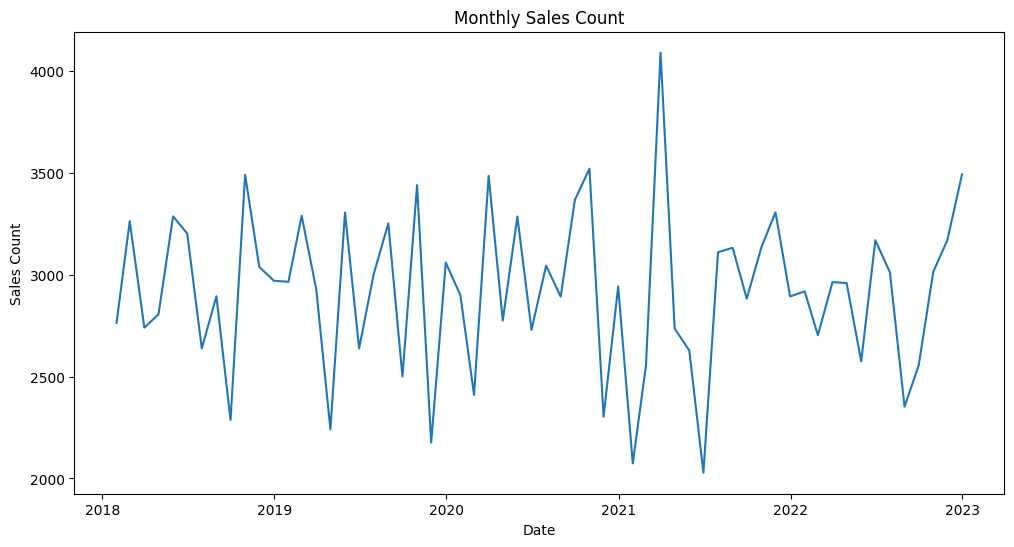

In [ ]:
# Converting 'last_stock_date' to datetime format
data['last_stock_date'] = pd.to_datetime(data['last_stock_date'])

# Setting the date as index
data.set_index('last_stock_date', inplace=True)

# Resampling the data to monthly sales
monthly_sales = data['sales_count'].resample('M').sum()

# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Count')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.show()


The x-axis shows the year, and the y-axis shows the monthly sales count. Here are some observations from the graph:

*   There appears to be a seasonal trend in sales, with sales rising in the later part of each year.
*   Overall, sales appear to be increasing over the five years shown in the graph. Sales were lowest in 2018 and have grown steadily since then.



MACHINE LEARNING MODEL FOR TREND PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target variable
X = data.drop(['sales_count', 'cluster'], axis=1).select_dtypes(include=['float64', 'int64'])
y = data['sales_count']

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Developing the machine learning model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 19285.011976515154


The code effectively demonstrates a typical workflow for building a regression model using Random Forest. By selecting features, splitting the dataset, training the model, and evaluating its performance, you can assess how well the model predicts sales_count based on other features. The MSE gives a quantitative measure of prediction accuracy, which can be further improved by tuning model parameters or feature engineering.

In [ ]:
# Generating a sample trend report
trend_report = data.groupby('cluster')['sales_count'].mean().sort_values(ascending=False)
#Calculate mean for only the sales_count column
print(trend_report)


cluster
0    411.544828
1    325.950704
2    201.562963
4    194.418605
3    156.100917
Name: sales_count, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **NAMING CLUSTERS**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['price', 'sales_count', 'average_rating', 'discount', 'wish_list_count']

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)


In [ ]:
# Display cluster centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features)
print(centroids_df)


In [ ]:
# Grouping the data by clusters and calculating the mean for each feature
cluster_means = data.groupby('cluster')[features].mean()
# Selecting only the features columns before calculating the mean
print(cluster_means)


In [ ]:
# Define cluster names based on analysis
cluster_names = {
    0: "High Demand, Low Discount",
    1: "Low Demand, High Discount",
    2: "Moderate Demand, Moderate Discount",
    3: "High Rating, High Wishlist",
    4: "Low Rating, Low Wishlist"
}

# Map cluster numbers to names
data['cluster_name'] = data['cluster'].map(cluster_names)

# Display the first few rows to verify
print(data[['product_name', 'cluster', 'cluster_name']].head())
